In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [3]:
#loading data
path="data/Pima Indians Diabetes Database.csv"
df=pd.read_csv(path)
df.head(5)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_x=df.copy()
del df_x["Class variable (0 or 1)"]
df_x

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
X=df_x.values
y=df["Class variable (0 or 1)"].values

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, stratify=y, random_state=123)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (537, 8) (537,)
Test set: (231, 8) (231,)


#### model defining
- Output layer // Hidden Layer (8 neurons) // Hidden Layer (12 neurons) // Visible layer (8 inputs)
- input_dim = 8


In [7]:
from keras.models import Sequential
from keras.layers import Dense

num_features = 8 
model = Sequential()

model.add(Dense(12, input_dim=num_features, activation="relu"))
model.add(Dense(8, activation ="relu"))
model.add(Dense(12, activation ="relu"))
model.add(Dense(8, activation ="relu"))
model.add(Dense(1, activation="sigmoid"))

In [8]:
# Complie the keras model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [10]:
# fit the keras model

model_pima=model.fit(X_train, y_train, epochs =150, validation_split=0.33,batch_size=16)

Epoch 1/150
23/23 [==============================] - 0s 5ms/step - loss: 1.2060 - accuracy: 0.5181 - val_loss: 0.8489 - val_accuracy: 0.3371
Epoch 2/150
23/23 [==============================] - 0s 1ms/step - loss: 0.7579 - accuracy: 0.5599 - val_loss: 0.7422 - val_accuracy: 0.4213
Epoch 3/150
23/23 [==============================] - 0s 2ms/step - loss: 0.7273 - accuracy: 0.5515 - val_loss: 0.7184 - val_accuracy: 0.6685
Epoch 4/150
23/23 [==============================] - 0s 1ms/step - loss: 0.7030 - accuracy: 0.5627 - val_loss: 0.7290 - val_accuracy: 0.6629
Epoch 5/150
23/23 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5933 - val_loss: 0.6946 - val_accuracy: 0.6348
Epoch 6/150
23/23 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.5766 - val_loss: 0.7020 - val_accuracy: 0.5449
Epoch 7/150
23/23 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6379 - val_loss: 0.7555 - val_accuracy: 0.4326
Epoch 8/150
2

Epoch 59/150
23/23 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7298 - val_loss: 0.6635 - val_accuracy: 0.7022
Epoch 60/150
23/23 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.7159 - val_loss: 0.6015 - val_accuracy: 0.7247
Epoch 61/150
23/23 [==============================] - 0s 1ms/step - loss: 0.5076 - accuracy: 0.7242 - val_loss: 0.6485 - val_accuracy: 0.6910
Epoch 62/150
23/23 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7298 - val_loss: 0.6391 - val_accuracy: 0.6910
Epoch 63/150
23/23 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7242 - val_loss: 0.6722 - val_accuracy: 0.6742
Epoch 64/150
23/23 [==============================] - 0s 1ms/step - loss: 0.5267 - accuracy: 0.7159 - val_loss: 0.6869 - val_accuracy: 0.6292
Epoch 65/150
23/23 [==============================] - 0s 1ms/step - loss: 0.5218 - accuracy: 0.7047 - val_loss: 0.6372 - val_accuracy: 0.6910
Epoch 

In [11]:
#Model evaluation

# test_loss, test_acc = model.evaluate(test_images, test_labels)
_, accuracy_train=model.evaluate(X_train,y_train)
print("Accuracy in train : %.2f" % (accuracy_train*100)) #best accuracy in test
_, accuracy_test=model.evaluate(X_test,y_test)
print("Accuracy in test: %.2f" % (accuracy_test*100)) #best accuracy in test


17/17 [==============================] - 0s 529us/step - loss: 0.6680 - accuracy: 0.7430
Accuracy in train : 74.30
8/8 [==============================] - 0s 625us/step - loss: 0.6413 - accuracy: 0.6580
Accuracy in test: 65.80


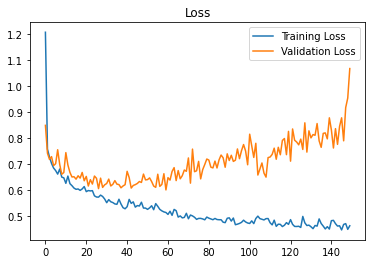

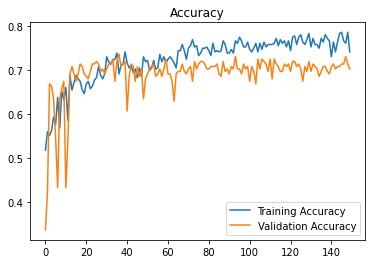

In [12]:
history = model_pima.history
plot_metrics(history)

In [13]:
#Make class predictions
#predictions=model.predict_classes(X) deprecated 
Y_pred=np.argmax(model.predict(X_test),axis=-1)

In [17]:
# Clasification report
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       0.00      0.00      0.00        81

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231



C:\Users\Shei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


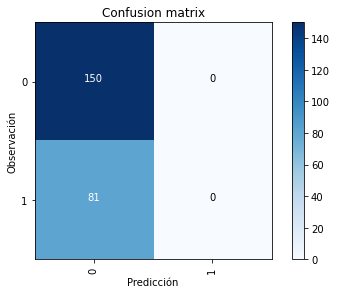

In [18]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

confusion_mtx = confusion_matrix(y_test, Y_pred) 
plot_confusion_matrix(confusion_mtx, classes = range(2))

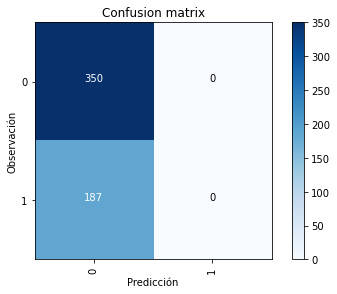

In [20]:
y_pred=np.argmax(model.predict(X_train),axis=-1)
confusion_mtx = confusion_matrix(y_train, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = range(2))